 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [473]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [474]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()
#whale_returns_df = pd.read_csv(whale_returns_csv)
#whale_returns_df.dtypes
#whale_returns_df.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [475]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [476]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [477]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()
algo_returns_df.tail(20)


,Algo 1,Algo 2
Date,,
2019-04-03,-0.003337,0.000287
2019-04-04,-0.003597,0.003265
2019-04-05,0.001519,0.009306
2019-04-08,0.003761,0.000218
2019-04-09,0.012012,-0.011639
2019-04-10,-0.004221,0.009632
2019-04-11,0.001705,-0.001568
2019-04-12,-0.005501,0.004504
2019-04-15,-0.004331,-0.004572


In [478]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [479]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [480]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [481]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [482]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$","")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")

sp500_history_df.dtypes
#sp500_history_df.head()

Close    float64
dtype: object

In [483]:
# Calculate Daily Returns
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [484]:
# Drop nulls
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [485]:
# Rename Column
sp500_returns_df.columns = ['SP500'] 
sp500_returns_df.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [486]:
# Concatenate all DataFrames into a single DataFrame
combo_daily_returns = pd.concat([sp500_returns_df,
                                 whale_returns_df,
                                 algo_returns_df],
                                axis="columns",
                                join="inner")

combo_daily_returns.sort_index(inplace=True)
combo_daily_returns.dropna(inplace=True)
combo_daily_returns.head()

,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,0.004408,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.001195,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.014378,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.003929,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.017254,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:title={'center':'Comparison of Daily Returns'}, xlabel='Date'>

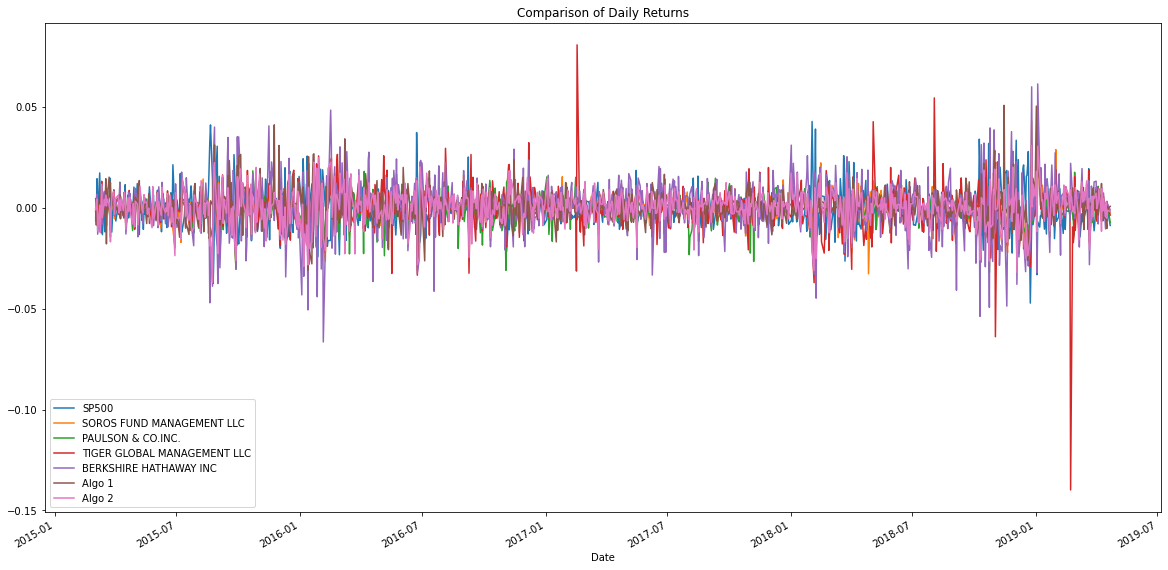

In [487]:
# Plot daily returns
combo_daily_returns.plot(figsize=(20,10),title='Comparison of Daily Returns')

<AxesSubplot:title={'center':'Comparison of Cumulative Returns'}, xlabel='Date'>

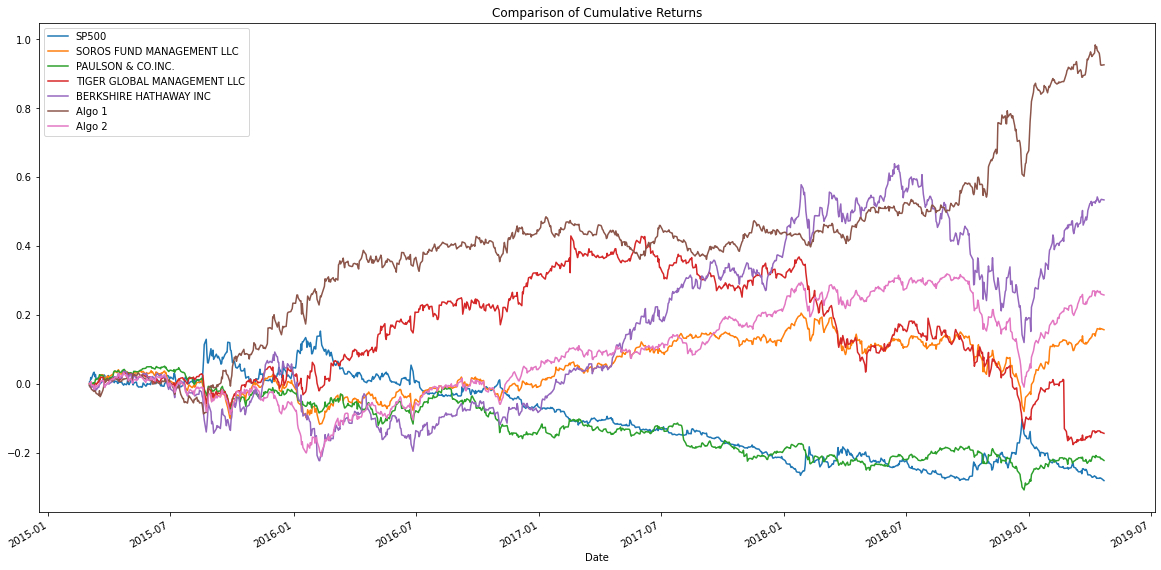

In [488]:
# Plot cumulative returns
combo_cumul_returns = (1+combo_daily_returns).cumprod()-1
#combo_cumul_returns.head()
combo_cumul_returns.plot(figsize=(20,10),title='Comparison of Cumulative Returns')


## Performance analysis
_Based on these graphs, it appears most of the portfolios exceeded the S&P500 performance after mid 2016. With exception of Paulson & Co fund which is below or similar through much of this time span. Also of note is the considerable draw down at end of 2018 for all but the SP500 itself. The Paulson portfolio considerably underperformed relative to SP500 during this time._

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

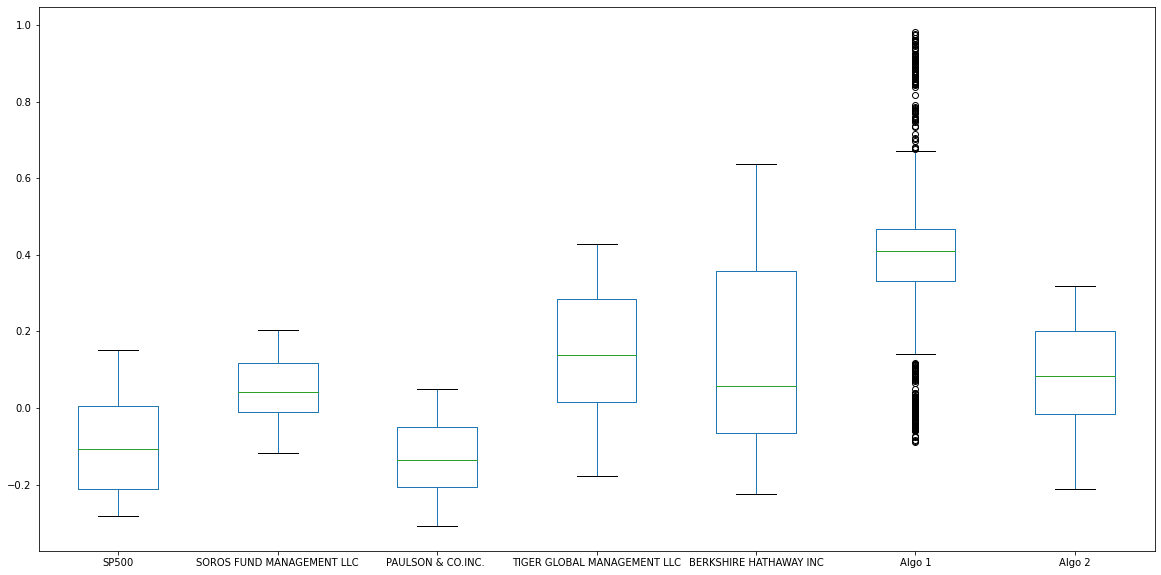

In [489]:
# Box plot to visually show risk
combo_cumul_returns.plot(kind='box',figsize=(20,10))

In [490]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 

combo_daily_stddev= combo_daily_returns.std()
combo_daily_stddev.sort_values()

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
SP500                          0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [491]:
# Determine which portfolios are riskier than the S&P 500
combo_daily_stddev[combo_daily_stddev > combo_daily_stddev["SP500"]]

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [492]:
# Calculate the annualized standard deviation (252 trading days)
combo_annual_stddev = combo_daily_returns.std() *np.sqrt(252)
combo_annual_stddev.sort_values()

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
SP500                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:title={'center':'Comparison of 21-Day StdDev'}, xlabel='Date'>

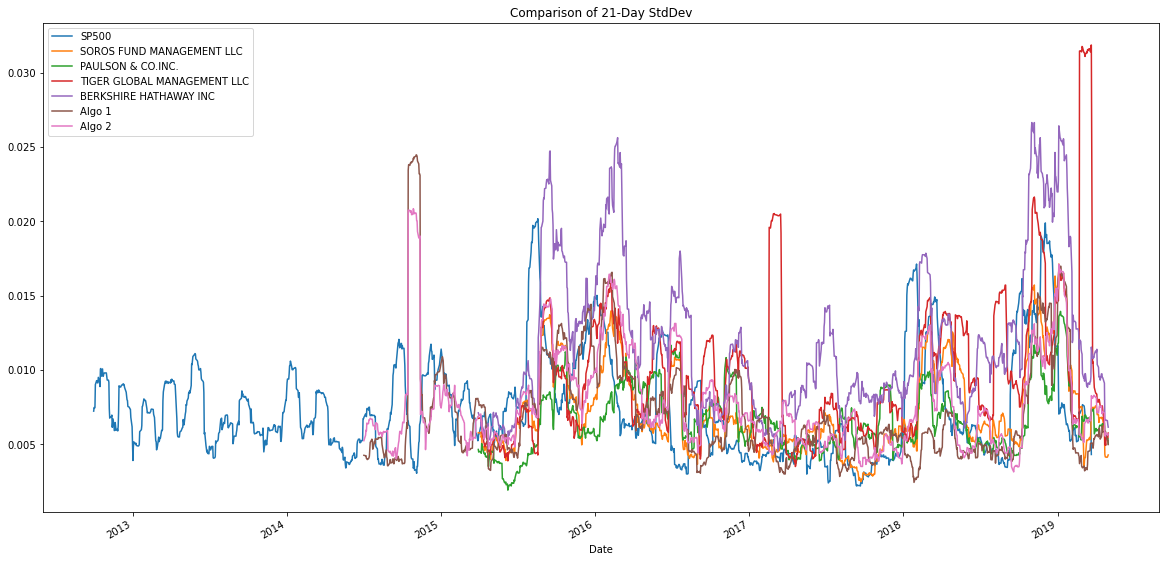

In [493]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
roll21_sp500_stddev = sp500_returns_df.rolling(window=21).std()
roll21_whales_stddev = whale_returns_df.rolling(window=21).std()
roll21_algo_stddev = algo_returns_df.rolling(window=21).std()

ax = roll21_sp500_stddev.plot(figsize=(20,10),title='Comparison of 21-Day StdDev')
roll21_whales_stddev.plot(ax=ax)
roll21_algo_stddev.plot(ax=ax)

In [494]:
# Construct a correlation table
correlation = combo_daily_returns.corr()
correlation

,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SP500,1.000000,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192
SOROS FUND MANAGEMENT LLC,0.000574,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730
PAULSON & CO.INC.,0.013549,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160
BERKSHIRE HATHAWAY INC,-0.013856,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756
Algo 1,-0.033963,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852
Algo 2,-0.002192,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000


<AxesSubplot:title={'center':'Beta of Algo 1'}, xlabel='Date'>

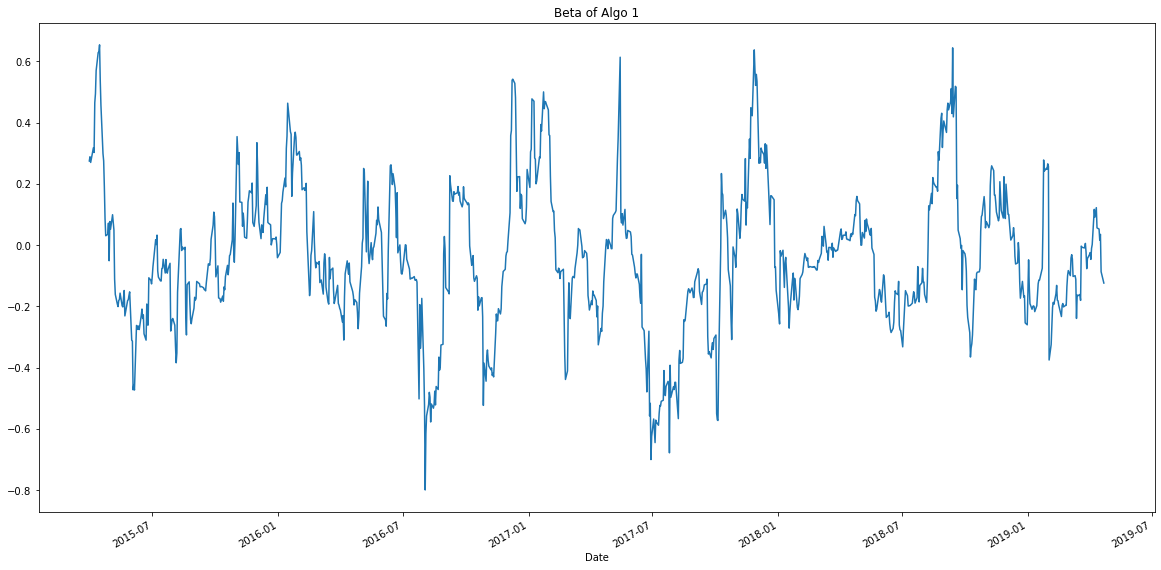

In [495]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

# Beta = covariance / variance
# Choosing Algo1 portfolio on 21day rolling window

roll21_algo1_covariance = combo_daily_returns['Algo 1'].rolling(window=21).cov(combo_daily_returns['SP500'])
roll21_variance = combo_daily_returns['SP500'].rolling(window=21).var()
roll21_algo1_beta = roll21_algo1_covariance / roll21_variance
roll21_algo1_beta.plot(figsize=(20,10),title='Beta of Algo 1')


<AxesSubplot:title={'center':'Exponential Weighted Moving Average (21) for all Portfolios'}, xlabel='Date'>

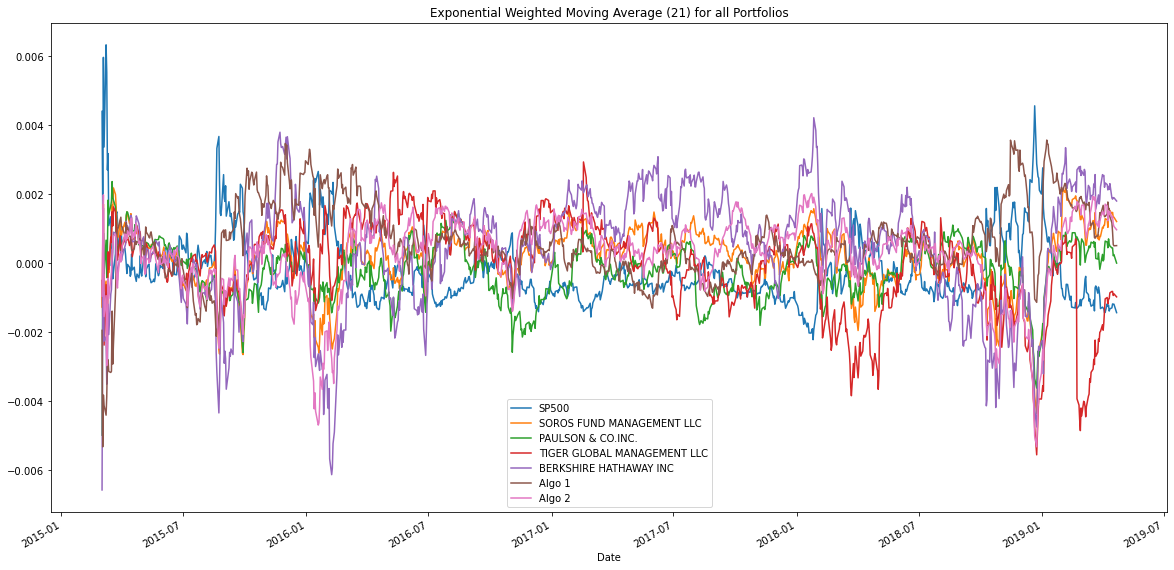

In [496]:
# Calculate a rolling window using the exponentially weighted moving average. 
roll21_combo_ewm = combo_daily_returns.ewm(halflife=21).mean()
roll21_combo_ewm.plot(figsize=(20,10),title='Exponential Weighted Moving Average (21) for all Portfolios')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [497]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combo_daily_returns.mean() * 252) / (combo_daily_returns.std() * np.sqrt(252))
sharpe_ratios


SP500                         -0.518582
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of all Portfolios'}>

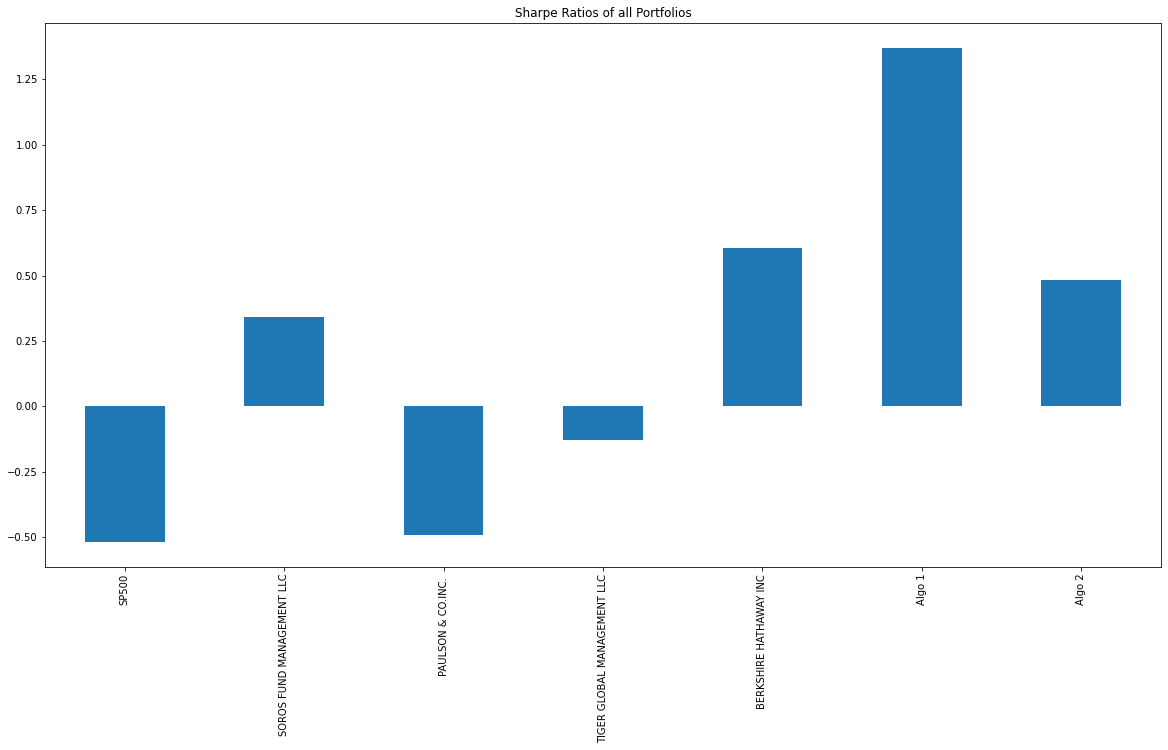

In [498]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',figsize=(20,10),title='Sharpe Ratios of all Portfolios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: YES


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [499]:
# Read the first stock
aapl_history_csv = Path("Resources/aapl_historical.csv")
aapl_history_df = pd.read_csv(aapl_history_csv)
aapl_history_df = aapl_history_df.rename(columns={
    "Trade DATE": "Date",
    "NOCP": "Close"
})
aapl_history_df.set_index(pd.to_datetime(aapl_history_df['Date'], infer_datetime_format=True), inplace=True)
aapl_history_df.drop(columns=['Date'], inplace=True)
aapl_history_df.head()


,Symbol,Close
Date,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [500]:
# Read the second stock
cost_history_csv = Path("Resources/cost_historical.csv")
cost_history_df = pd.read_csv(cost_history_csv)
cost_history_df = cost_history_df.rename(columns={
    "Trade DATE": "Date",
    "NOCP": "Close"
})
cost_history_df.set_index(pd.to_datetime(cost_history_df['Date'], infer_datetime_format=True), inplace=True)
cost_history_df.drop(columns=['Date'], inplace=True)
cost_history_df.head()


,Symbol,Close
Date,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [501]:
# Read the third stock
goog_history_csv = Path("Resources/goog_historical.csv")
goog_history_df = pd.read_csv(goog_history_csv)
goog_history_df = goog_history_df.rename(columns={
    "Trade DATE": "Date",
    "NOCP": "Close"
})
goog_history_df.set_index(pd.to_datetime(goog_history_df['Date'], infer_datetime_format=True), inplace=True)
goog_history_df.drop(columns=['Date'], inplace=True)
goog_history_df.head()


,Symbol,Close
Date,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [502]:
# Concatenate all stocks into a single DataFrame
stocktrio_history_df = pd.concat([aapl_history_df,cost_history_df,goog_history_df],
                                 axis="rows",
                                 join="inner")
stocktrio_history_df

,Symbol,Close
Date,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [503]:
# Reset the index
stocktrio_history_df.reset_index()
stocktrio_history_df.sort_index(inplace=True)
stocktrio_history_df

,Symbol,Close
Date,,
2018-05-11,GOOG,1098.26
2018-05-11,AAPL,188.59
2018-05-11,COST,195.76
2018-05-14,AAPL,188.15
2018-05-14,COST,195.88
...,...,...
2019-05-08,COST,241.34
2019-05-08,AAPL,202.90
2019-05-09,GOOG,1162.38


In [504]:
# Pivot so that each column of prices represents a unique symbol
stocktrio_history_df = stocktrio_history_df.pivot_table(values="Close",
                                                       index="Date",
                                                       columns="Symbol")
stocktrio_history_df

Symbol,AAPL,COST,GOOG
Date,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [505]:
# Calculate daily returns per each stock
stocktrio_returns = stocktrio_history_df.pct_change()
#Drop Nulls
stocktrio_returns.dropna(inplace=True)
stocktrio_returns.head()

Symbol,AAPL,COST,GOOG
Date,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [506]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
custom_returns = pd.DataFrame(stocktrio_returns.dot(weights))
custom_returns.rename(columns={0:'Custom'},inplace=True)
custom_returns

,Custom
Date,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061
...,...
2019-05-03,0.013329
2019-05-06,-0.004557
2019-05-07,-0.018798


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [507]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# Only compare dates where return data exists for all the stocks (drop NaNs)
mycombo_daily_returns = pd.concat([combo_daily_returns,
                                   custom_returns],
                                  axis="columns",
                                  join="outer")
mycombo_daily_returns.sort_index(inplace=True)
mycombo_daily_returns.dropna(inplace=True)
mycombo_daily_returns

,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom
Date,,,,,,,,
2018-05-14,0.006889,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000015
2018-05-15,-0.004044,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.010064
2018-05-16,0.000857,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.009403
2018-05-17,0.002639,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.001595
2018-05-18,-0.007333,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-15,-0.000509,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,0.007522
2019-04-16,0.002279,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000340
2019-04-17,-0.001577,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,0.009292


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [508]:
# Risk
mycombo_daily_stddev= mycombo_daily_returns.std()
mycombo_daily_stddev.sort_values()


PAULSON & CO.INC.              0.007366
Algo 1                         0.008437
Algo 2                         0.008788
SOROS FUND MANAGEMENT LLC      0.009248
SP500                          0.009605
Custom                         0.013331
TIGER GLOBAL MANAGEMENT LLC    0.014671
BERKSHIRE HATHAWAY INC         0.015579
dtype: float64

<AxesSubplot:title={'center':'Comparison of 21-Day StdDev'}, xlabel='Date'>

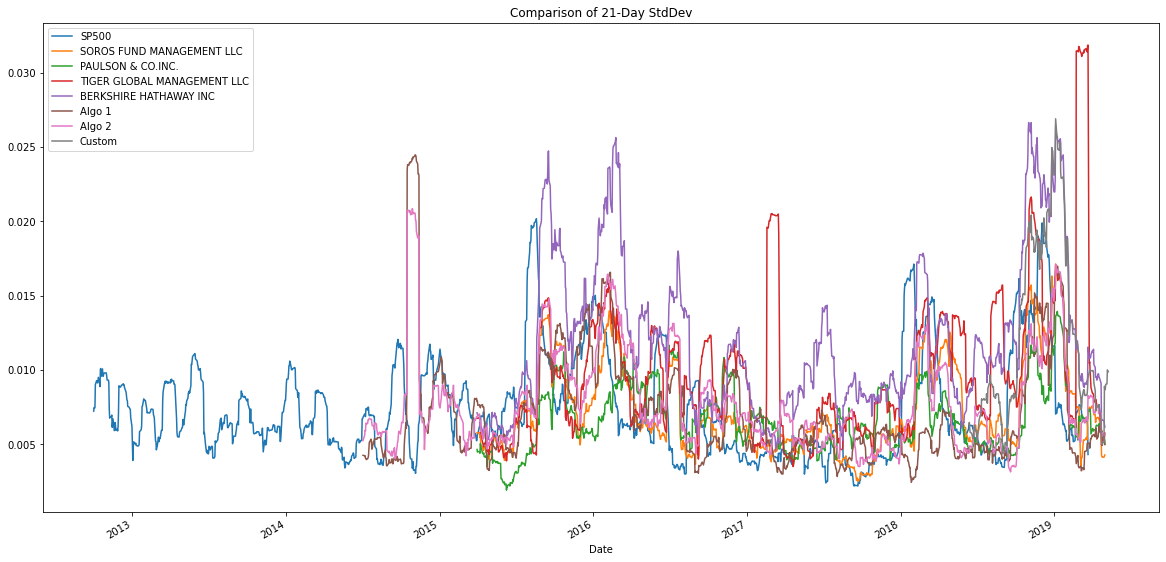

In [509]:
# Rolling

roll21_sp500_stddev = sp500_returns_df.rolling(window=21).std()
roll21_whales_stddev = whale_returns_df.rolling(window=21).std()
roll21_algo_stddev = algo_returns_df.rolling(window=21).std()
roll21_custom_stddev = custom_returns.rolling(window=21).std()

ax = roll21_sp500_stddev.plot(figsize=(20,10),title='Comparison of 21-Day StdDev')
roll21_whales_stddev.plot(ax=ax)
roll21_algo_stddev.plot(ax=ax)
roll21_custom_stddev.plot(ax=ax)


In [510]:
# Annualized Sharpe Ratios
custom_sharpe_ratios = (mycombo_daily_returns.mean() * 252) / (mycombo_daily_returns.std() * np.sqrt(252))
custom_sharpe_ratios


SP500                         -0.427676
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
Custom                         0.876152
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of all Portfolios (including Custom)'}>

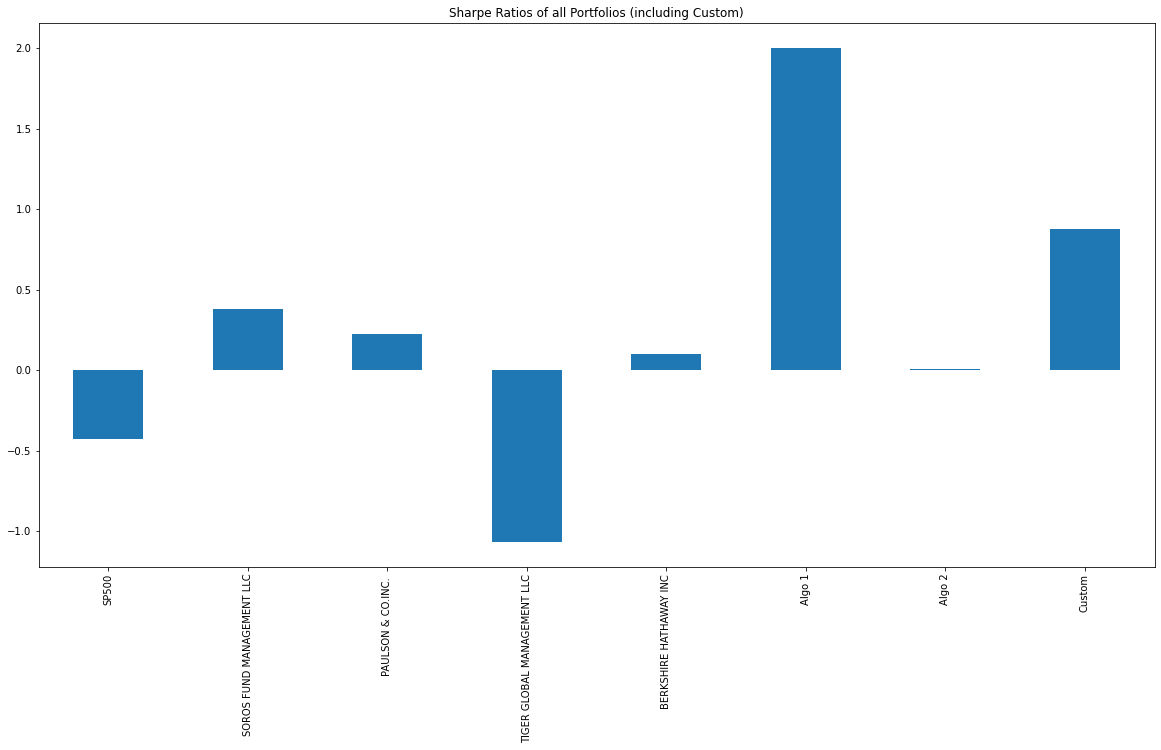

In [511]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_ratios.plot(kind='bar',figsize=(20,10),title='Sharpe Ratios of all Portfolios (including Custom)')

In [512]:
# Create a correlation analysis
custom_correlation = mycombo_daily_returns.corr()
custom_correlation


,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom
SP500,1.000000,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,0.005603
SOROS FUND MANAGEMENT LLC,-0.028256,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,0.732548
PAULSON & CO.INC.,-0.059862,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.005881,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.390961
BERKSHIRE HATHAWAY INC,-0.038832,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,0.800558
Algo 1,-0.054478,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,0.260331
Algo 2,-0.042540,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,0.739020
Custom,0.005603,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,1.000000


<AxesSubplot:title={'center':'Beta of Custom'}, xlabel='Date'>

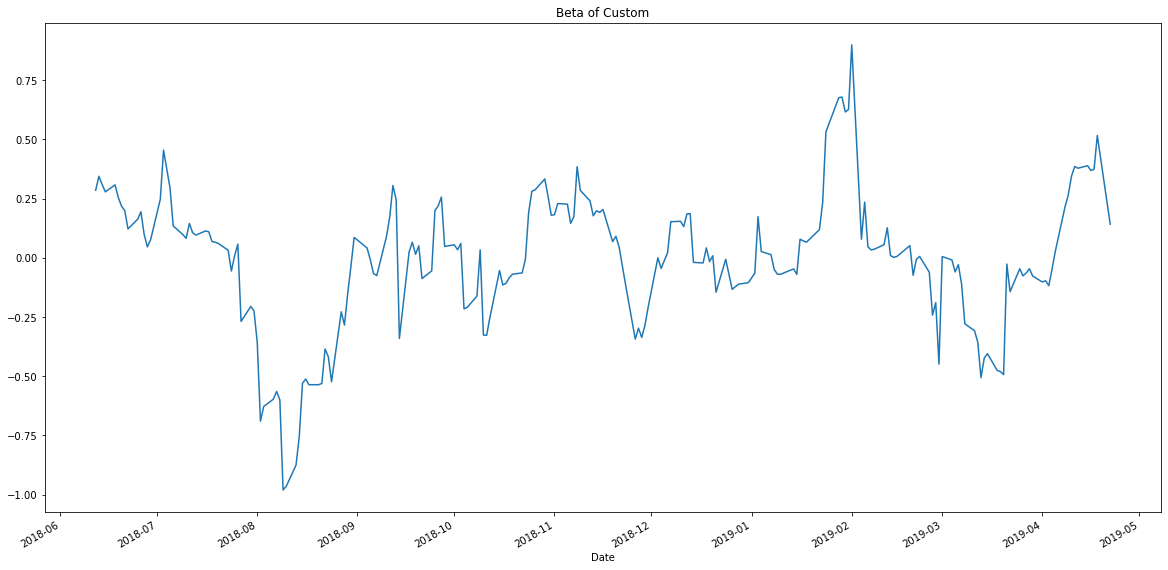

In [513]:
# Beta
# Beta = covariance / variance
# Choosing Custom portfolio on 21day rolling window

roll21_custom_covariance = mycombo_daily_returns['Custom'].rolling(window=21).cov(mycombo_daily_returns['SP500'])
roll21_custom_variance = mycombo_daily_returns['SP500'].rolling(window=21).var()
roll21_custom_beta = roll21_custom_covariance / roll21_custom_variance
roll21_custom_beta.plot(figsize=(20,10),title='Beta of Custom')


## My Portfolio Analysis and Conclusions
The equally weighted custom portfolio of Apple Computers (AAPL), Costco (COST), and Alphabet (GOOG) has a higher beta than S&P 500 index and Algorithm 1. 
However, considering its ease of construction, without an algorithm, it has the second best performance as measured by the Sharpe Ratios.
